# ENGS93: Statistical Methods in Engineering:
## Homework 4

---

**IMPORTANT:**
Your answers in R should be put in the input box below the question. Make sure to *File->Save and Checkpoint* your notebook in order to save your code answers as you go. Once you are finished, save your R notebook and submit it to Canvas alongside a pdf of your written work. 

Note: Each sub-question is worth 5 points.

---


**QUESTION 1:** This problem continues the scenario from R Exercise #2. We have provided the code in the input box below. Please run this box so the variables are created. This means you can access them as you complete the HW questions. 

In [55]:
#RUN THIS CELL
normtemp <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/normtemp.txt", header = TRUE, sep = "\t", dec = ".")
fat <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/fat.txt", header = TRUE, sep = "\t", dec = ".")
summary(normtemp)
summary(fat)
attach(normtemp)
attach(fat)

Warning message in file(file, "rt"):
“URL 'https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/normtemp.txt': status was 'Couldn't resolve host name'”


ERROR: Error in file(file, "rt"): cannot open the connection to 'https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/normtemp.txt'


 ## Question 1 part a)

Some have suggested that 98.2°F is a better value for the mean body temperature. Perform a hypothesis test of HO: μ = 98.2, H1: μ ≠ 98.2. Is the difference statistically significant at the 𝛼
= 0.05 level? What is the p-value? Find the answer to this question both with and without using
the command ```t.test( . )``` and compare the two answers as before.

In [56]:
t.test(temperature,mu=98.2,alt="two.sided")


	One Sample t-test

data:  temperature
t = 0.76559, df = 129, p-value = 0.4453
alternative hypothesis: true mean is not equal to 98.2
95 percent confidence interval:
 98.12200 98.37646
sample estimates:
mean of x 
 98.24923 


In [46]:
xbar_temperature = mean(temperature)
len_temperature = length(temperature)
var_temperature = var(temperature)
t = (xbar_temperature-98.2)/((var_temperature/len_temperature)^(1/2))

2*(1-pnorm(t))
2*(1-pt(t, n-1, lower.tail=TRUE)) #t-test for better calcalation

[1] 0.4439208

[1] 0.4453192

In [57]:
There is no significant difference because p-value=0.445319249996802 > 𝛼 = 0.05

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: There is
          ^


## Question 1 part b)

Do females have a different body temperature than males? We will answer this by using a
hypothesis test on the difference between two means. Extract the temperatures for just the
females and males in the study with the following commands: 

>```females = temperature[gender == 1]```

>```males = temperature[gender == 2]```

You can use the formula: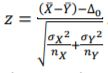. 

Clearly state and test the appropriate hypotheses
using step-by-step R calculations. Clearly state your conclusion.

In [61]:
females = temperature[gender == 1]
males = temperature[gender == 2]
xbar_female = mean(females)
xbar_male = mean(males)
var_female = var(females)
var_male = var(males)
len_female = length(females)
len_male = length(males)
z = (xbar_female-xbar_male)/(var_female/len_female+var_male/len_male)^(1/2)
2*pnorm(z)


[1] 0.02228736

## Question 1 part c)

The body mass index, BMI, is a measurement of weight divided by height squared (both in
metric units). “Normal” values are in the range [18.5, 25]. Perform a significance test to see
whether the mean BMI is at most 25 versus an alternate that it is greater.


In [48]:
xbar_BMI=mean(BMI)
len_BMI=length(BMI)
var_BMI=var(BMI)
z = (xbar_BMI-25)/(var_BMI/len_BMI)^(1/2)
1-pnorm(z)

t.test(BMI,mu=25,alt="greater")

[1] 0.02864043


	One Sample t-test

data:  BMI
t = 1.9012, df = 251, p-value = 0.02921
alternative hypothesis: true mean is greater than 25
95 percent confidence interval:
 25.0575     Inf
sample estimates:
mean of x 
  25.4369 


>i. First, write down the null and alternate hypotheses. (1 point)

Null hypothesis: the smaple mean of BMI is equal or less than 25
\
Alternate hypothesis: the sample mean of BMI is greater than 25

>ii. What is the p-value? (2 points)

 p-value = 0.02921

> iii. Is the difference statistically significant?

Yeah. Since p-value = 0.02921 < 0.05, the different is significant

## Question 1 part d)

The comparison of body temperatures between males and females that you performed above can also be implemented directly using t.test( ) and specifying two variables males and females created above ```t.test(males, females, alt="two.sided")```.

Perform the hypothesis test  with the command above. How do the results  compare to your step-by-step  solution  above  in  part  b?  How  do  the  results  differ  if  you  use ```alt="less"```? What about ```alt="greater"```? What happens if you reverse the order of the variables male and female?

In [49]:
t.test(males, females, alt="two.sided")
t.test(males, females, alt="less")
t.test(males, females, alt="greater")
t.test(females, males, alt="two.sided")


	Welch Two Sample t-test

data:  males and females
t = 2.2854, df = 127.51, p-value = 0.02394
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03881298 0.53964856
sample estimates:
mean of x mean of y 
 98.39385  98.10462 



	Welch Two Sample t-test

data:  males and females
t = 2.2854, df = 127.51, p-value = 0.988
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4989169
sample estimates:
mean of x mean of y 
 98.39385  98.10462 



	Welch Two Sample t-test

data:  males and females
t = 2.2854, df = 127.51, p-value = 0.01197
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.07954459        Inf
sample estimates:
mean of x mean of y 
 98.39385  98.10462 



	Welch Two Sample t-test

data:  females and males
t = -2.2854, df = 127.51, p-value = 0.02394
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.53964856 -0.03881298
sample estimates:
mean of x mean of y 
 98.10462  98.39385 


p-value in b is 0.0286 which is similar but bigger to the p-value in d which is 0.02394. 
Using alt="less" calculate the probability of the left hand side of the z-score. 
Using alt="greater" calculates the probability of the right hand side of the z-score.
If reverse the order of the variables male and female, the confidence interval is symmetric with the original confidence level.

Note that an alternative syntax (the model formula syntax) can be used for performing a two-sample test when there is one variable (gender) used to indicate a level of some factor for a subject. (These variables are referred to as indicator variables.) Thet-test above, may be carried out with the syntax: ```t.test(temperature ~ gender)```

In [59]:
t.test(temperature ~ gender)


	Welch Two Sample t-test

data:  temperature by gender
t = -2.2854, df = 127.51, p-value = 0.02394
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.53964856 -0.03881298
sample estimates:
mean in group 1 mean in group 2 
       98.10462        98.39385 


We will use this type of syntax in the future for regression analysis and ANOVA models. You can verify that using the model formula above gives the same output and also that the default value for ```alt=``` is ```"two.sided"```.

In [60]:
t.test(temperature ~ gender, alt = "two.sided")


	Welch Two Sample t-test

data:  temperature by gender
t = -2.2854, df = 127.51, p-value = 0.02394
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.53964856 -0.03881298
sample estimates:
mean in group 1 mean in group 2 
       98.10462        98.39385 
